<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
con

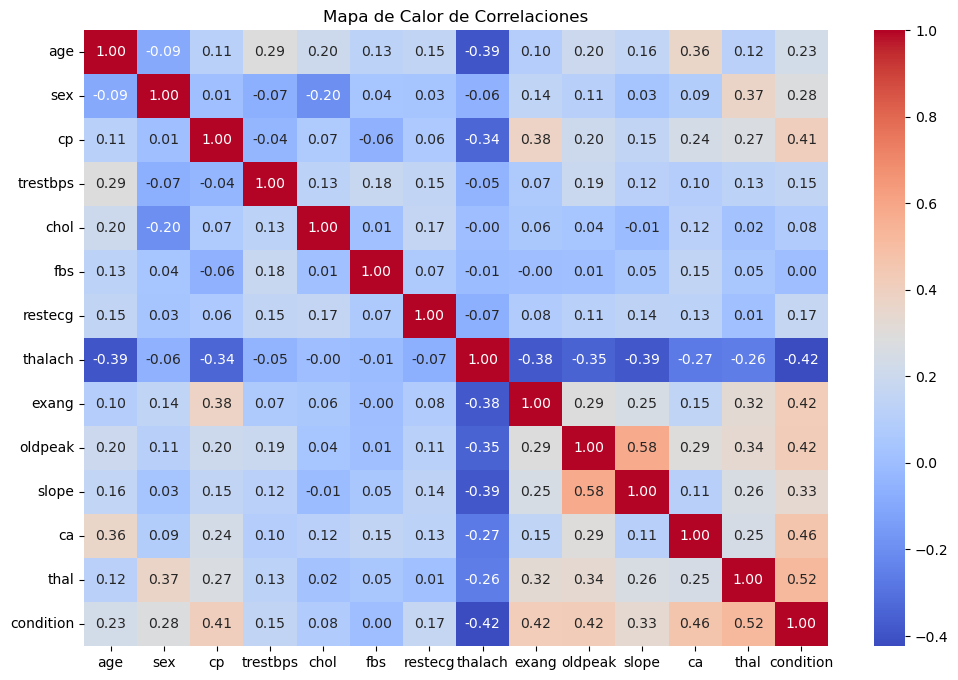

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_cleveland_upload.csv')

# Información y revisión de nulos
print(df.info())
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

## procesamiento de datos

In [13]:
# Convertir variables categóricas en dummies
categorical_features = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separar características y target
from sklearn.preprocessing import StandardScaler
features = df.drop('condition', axis=1)
target = df['condition']

# Escalar datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## seleccion de caracteristicas

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(features_scaled, target)
selected_features = features.columns[selector.get_support()].tolist()

print("Características seleccionadas:", selected_features)

## División en Train y Test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features[selected_features], target, test_size=0.2, random_state=42)

## Entrenamiento del Modelo

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluación del Modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



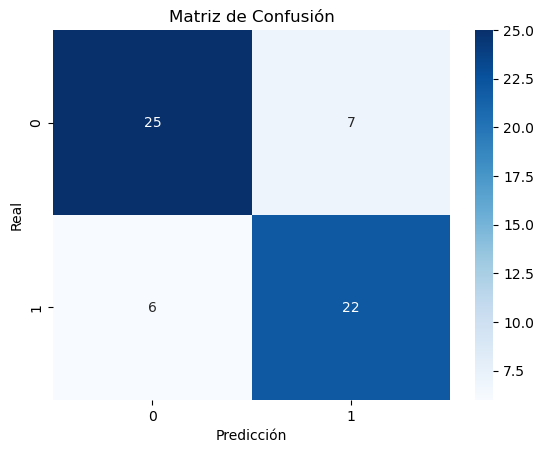

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Curva ROC 

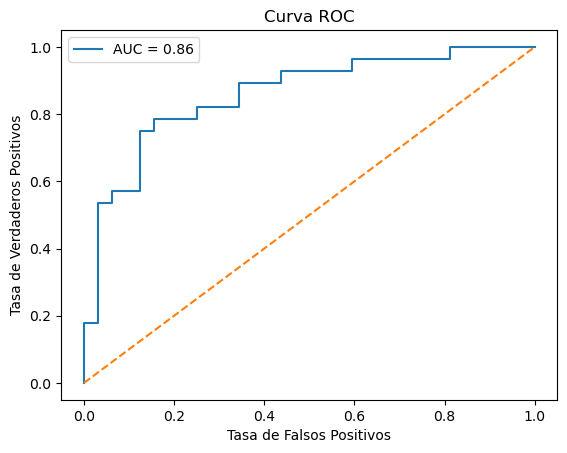

In [34]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()


## Interpretación de Resultados

In [37]:
# Accuracy general
accuracy = model.score(X_test, y_test)
print(f"Precisión del modelo (accuracy): {accuracy:.2f}")


Precisión del modelo (accuracy): 0.78
